<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-08-24 07:53:26--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
169.63.118.104ourses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  59.7MB/s    in 2.5s    

2025-08-24 07:53:29 (59.7 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the data


In [12]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [13]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



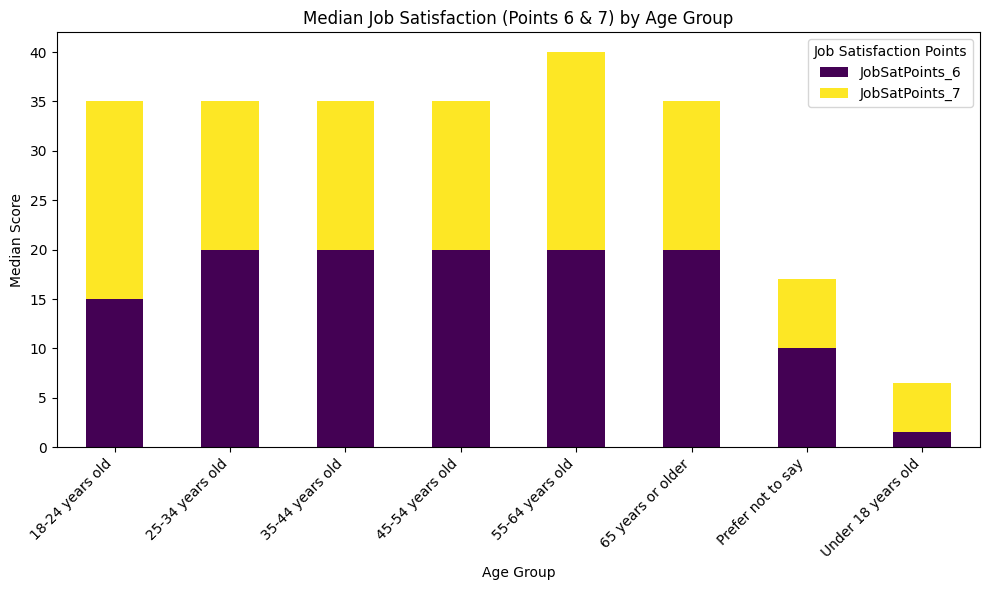

In [7]:
##Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to database
conn = sqlite3.connect("survey-results-public.sqlite")

# Load Age and JobSatPoints columns
query = """
SELECT Age, JobSatPoints_6, JobSatPoints_7
FROM main
WHERE Age IS NOT NULL
"""
df = pd.read_sql(query, conn)

# Convert numeric cols
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
df['JobSatPoints_7'] = pd.to_numeric(df['JobSatPoints_7'], errors='coerce')

# Group by Age and calculate median
age_grouped = df.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Plot stacked bar chart
age_grouped.plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),
    colormap='viridis'
)

plt.title("Median Job Satisfaction (Points 6 & 7) by Age Group")
plt.ylabel("Median Score")
plt.xlabel("Age Group")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Job Satisfaction Points")
plt.tight_layout()
plt.show()


##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


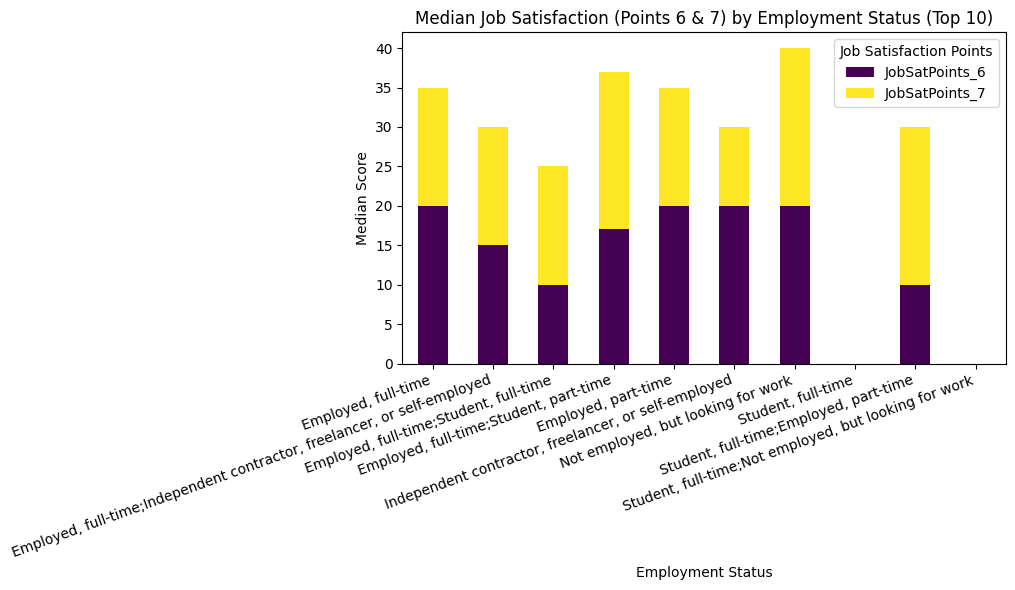

In [9]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already loaded with your survey dataset

# 1. Get the top 10 most common employment categories
top_employment = df['Employment'].value_counts().head(10).index

# 2. Filter dataset for only those categories
filtered_df = df[df['Employment'].isin(top_employment)]

# 3. Group by Employment and calculate median JobSatPoints
employment_grouped = filtered_df.groupby('Employment')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# 4. Plot stacked bar chart
employment_grouped.plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),
    colormap='viridis'
)

plt.title("Median Job Satisfaction (Points 6 & 7) by Employment Status (Top 10)")
plt.ylabel("Median Score")
plt.xlabel("Employment Status")
plt.xticks(rotation=20, ha='right')
plt.legend(title="Job Satisfaction Points")
plt.tight_layout()
plt.show()


### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


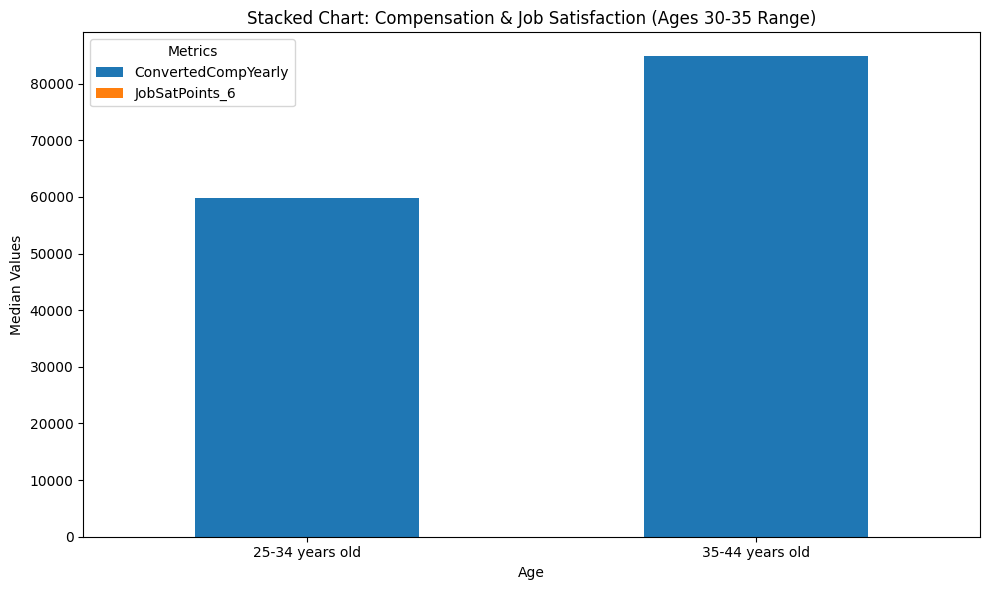

In [17]:
##Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# --- Connect to SQLite database ---
conn = sqlite3.connect("survey-results-public.sqlite")   # change to your db file

# --- Load relevant columns from the database ---
query = """
SELECT Age, ConvertedCompYearly, JobSatPoints_6
FROM main
WHERE Age IN ('25-34 years old', '35-44 years old')
"""
df = pd.read_sql(query, conn)

# --- Group by Age and calculate median values ---
grouped = df.groupby('Age')[['ConvertedCompYearly', 'JobSatPoints_6']].median()

# --- Plot stacked bar chart ---
ax = grouped.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Stacked Chart: Compensation & Job Satisfaction (Ages 30-35 Range)")
plt.ylabel("Median Values")
plt.xticks(rotation=0)
plt.legend(title="Metrics")
plt.tight_layout()
plt.show()

# --- Close connection ---
conn.close()





##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


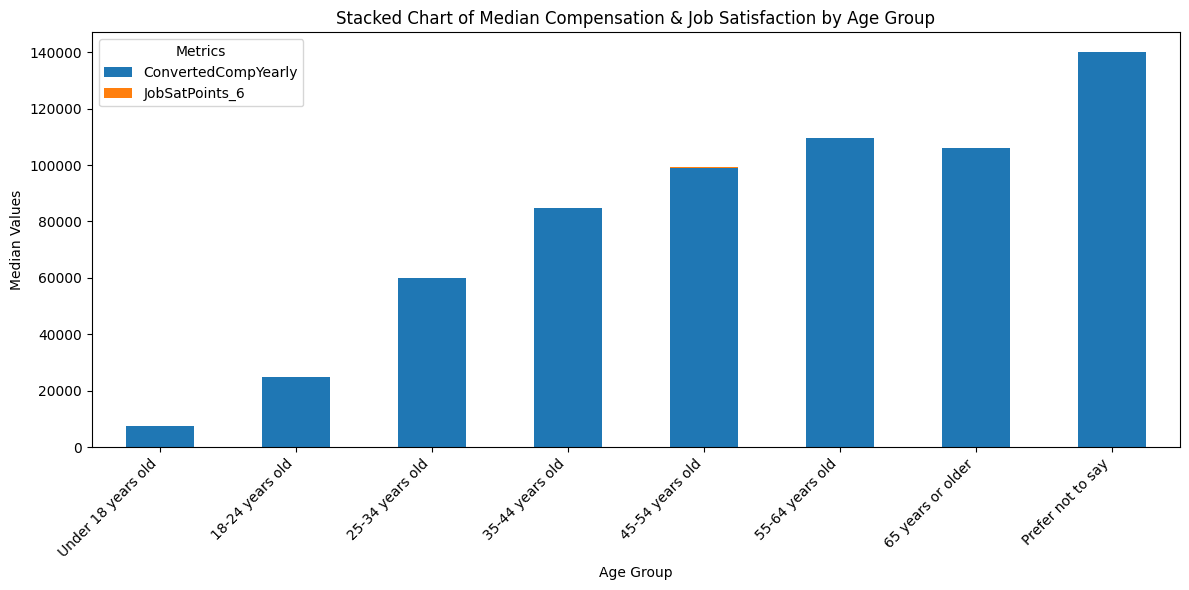

In [18]:
##Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# --- Connect to SQLite database ---
conn = sqlite3.connect("survey-results-public.sqlite")   # change to your db file

# --- Load relevant columns ---
query = """
SELECT Age, ConvertedCompYearly, JobSatPoints_6
FROM main
WHERE Age IS NOT NULL
"""
df = pd.read_sql(query, conn)

# --- Group by Age and calculate median values ---
grouped = df.groupby('Age')[['ConvertedCompYearly', 'JobSatPoints_6']].median()

# --- Sort by age category (to keep order logical) ---
age_order = ['Under 18 years old', '18-24 years old', '25-34 years old', 
             '35-44 years old', '45-54 years old', '55-64 years old', 
             '65 years or older', 'Prefer not to say']
grouped = grouped.reindex(age_order)

# --- Plot stacked bar chart ---
ax = grouped.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Stacked Chart of Median Compensation & Job Satisfaction by Age Group")
plt.ylabel("Median Values")
plt.xlabel("Age Group")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Metrics")
plt.tight_layout()
plt.show()

# --- Close connection ---
#conn.close()


### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


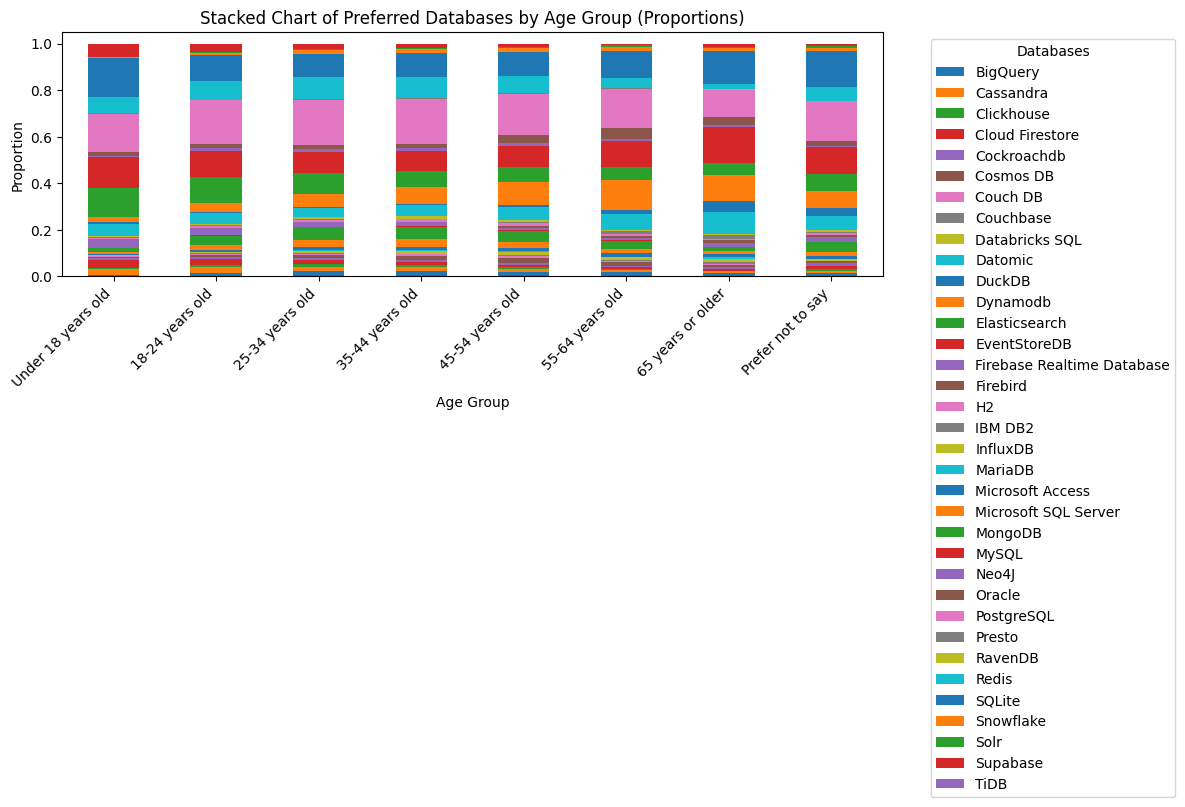

In [20]:
##Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# --- Connect to SQLite database ---
conn = sqlite3.connect("survey-results-public.sqlite")   # change to your db file

# --- Load relevant columns ---
query = """
SELECT Age, DatabaseWantToWorkWith
FROM main
WHERE Age IS NOT NULL AND DatabaseWantToWorkWith IS NOT NULL
"""
df = pd.read_sql(query, conn)

# --- Split multiple databases into separate rows ---
df['DatabaseWantToWorkWith'] = df['DatabaseWantToWorkWith'].str.split(';')
df = df.explode('DatabaseWantToWorkWith')

# --- Clean whitespace ---
df['DatabaseWantToWorkWith'] = df['DatabaseWantToWorkWith'].str.strip()

# --- Group and count ---
db_counts = df.groupby(['Age', 'DatabaseWantToWorkWith']).size().reset_index(name='Count')

# --- Pivot for stacked chart ---
pivot_df = db_counts.pivot_table(index='Age', columns='DatabaseWantToWorkWith', values='Count', fill_value=0)

# --- Normalize by row to show proportions ---
pivot_df = pivot_df.div(pivot_df.sum(axis=1), axis=0)

# --- Sort age order ---
age_order = ['Under 18 years old', '18-24 years old', '25-34 years old',
             '35-44 years old', '45-54 years old', '55-64 years old',
             '65 years or older', 'Prefer not to say']
pivot_df = pivot_df.reindex(age_order)

# --- Plot stacked chart ---
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Stacked Chart of Preferred Databases by Age Group (Proportions)")
plt.ylabel("Proportion")
plt.xlabel("Age Group")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Databases", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- Close connection ---
#conn.close()


##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


/tmp/ipykernel_1852/832166822.py:33: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


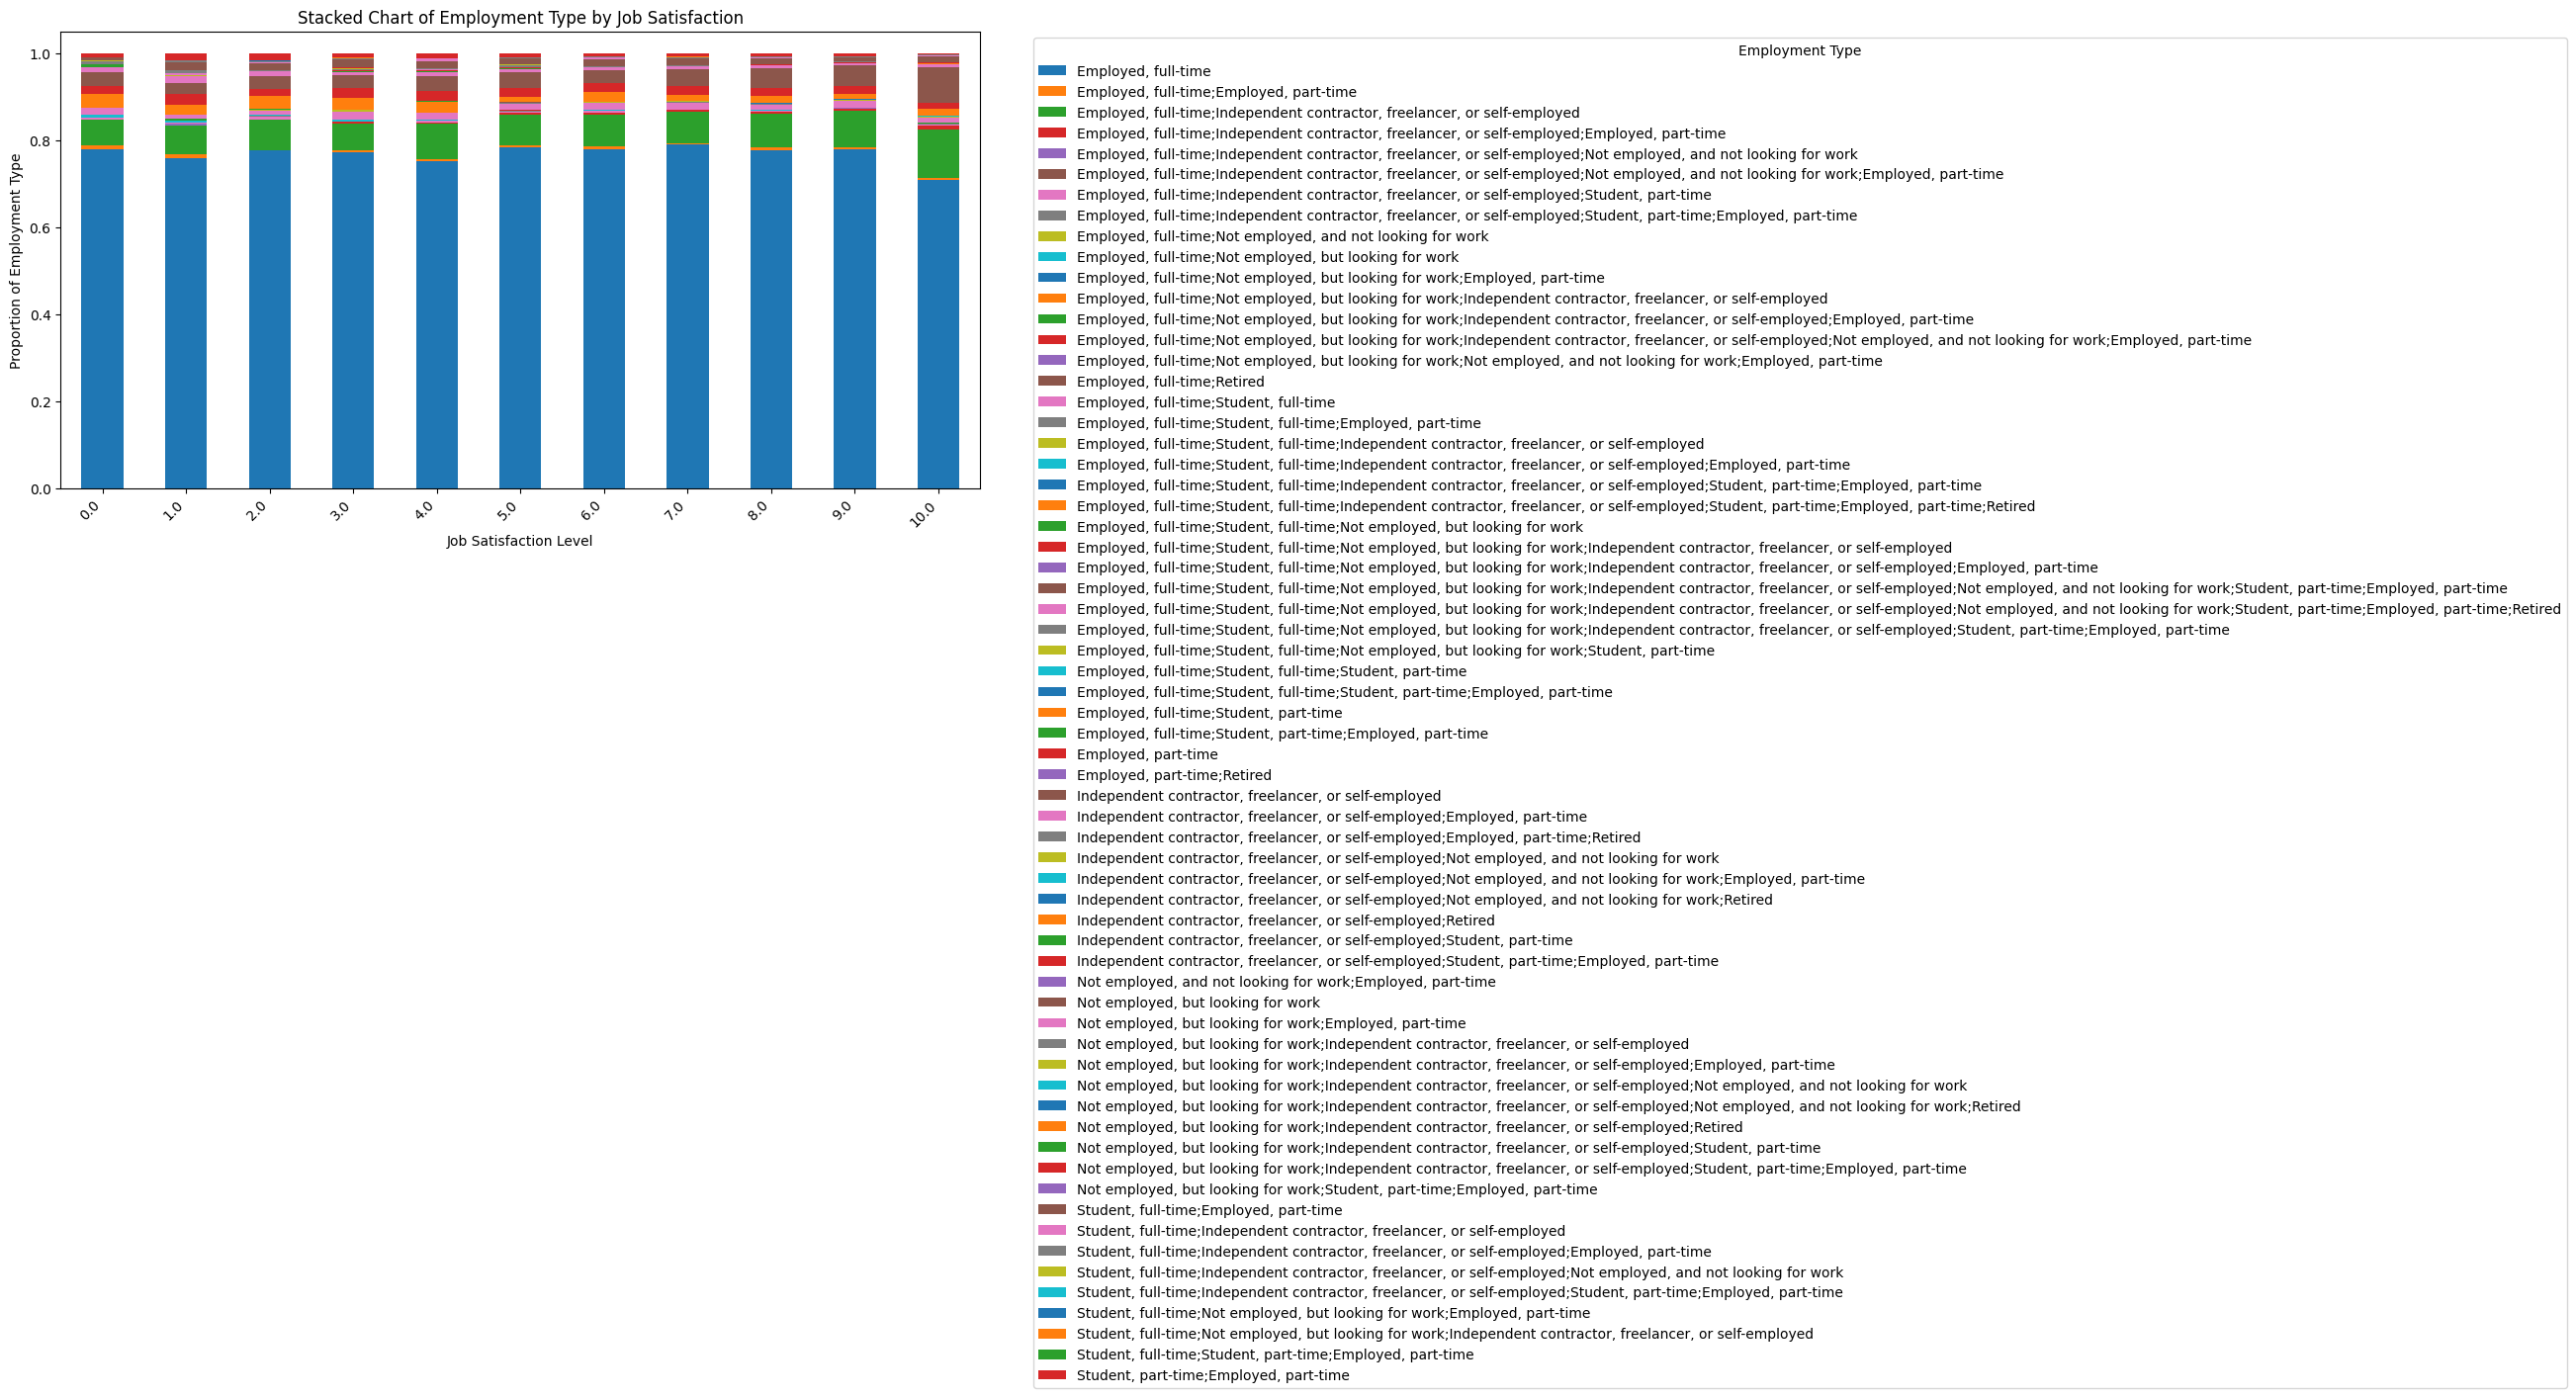

In [21]:
##Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# --- Connect to SQLite database ---
conn = sqlite3.connect("survey-results-public.sqlite")

# --- Load Employment and JobSat columns ---
query = """
SELECT Employment, JobSat
FROM main
WHERE Employment IS NOT NULL AND JobSat IS NOT NULL
"""
df = pd.read_sql(query, conn)

# --- Group and count ---
grouped = df.groupby(['JobSat', 'Employment']).size().reset_index(name='Count')

# --- Pivot for stacked chart ---
pivot_df = grouped.pivot_table(index='JobSat', columns='Employment', values='Count', fill_value=0)

# --- Normalize to proportions (optional, comment this if you want absolute counts) ---
pivot_df = pivot_df.div(pivot_df.sum(axis=1), axis=0)

# --- Plot stacked chart ---
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Stacked Chart of Employment Type by Job Satisfaction")
plt.ylabel("Proportion of Employment Type")
plt.xlabel("Job Satisfaction Level")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Employment Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- Close connection ---
conn.close()


### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


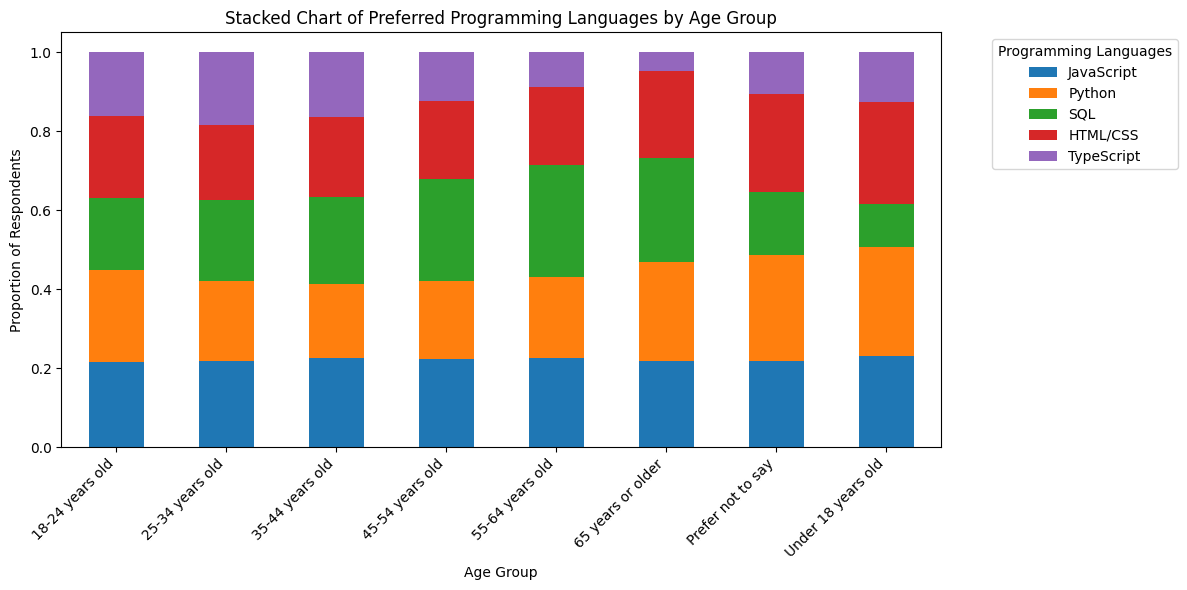

In [22]:
##Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# --- Connect to SQLite database ---
conn = sqlite3.connect("survey-results-public.sqlite")

# --- Load Age and LanguageAdmired columns ---
query = """
SELECT Age, LanguageAdmired
FROM main
WHERE Age IS NOT NULL AND LanguageAdmired IS NOT NULL
"""
df = pd.read_sql(query, conn)

# --- Split multiple languages (semicolon separated) ---
df['LanguageAdmired'] = df['LanguageAdmired'].str.split(';')

# --- Explode so each language is in its own row ---
df_exploded = df.explode('LanguageAdmired')

# --- Group and count by Age and LanguageAdmired ---
grouped = df_exploded.groupby(['Age', 'LanguageAdmired']).size().reset_index(name='Count')

# --- Pivot for stacked chart ---
pivot_df = grouped.pivot_table(index='Age', columns='LanguageAdmired', values='Count', fill_value=0)

# --- Optional: Select top 5 admired languages overall ---
top_languages = df_exploded['LanguageAdmired'].value_counts().head(5).index
pivot_df = pivot_df[top_languages]

# --- Normalize to proportions (so each age group sums to 1) ---
pivot_df = pivot_df.div(pivot_df.sum(axis=1), axis=0)

# --- Plot stacked chart ---
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Stacked Chart of Preferred Programming Languages by Age Group")
plt.ylabel("Proportion of Respondents")
plt.xlabel("Age Group")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Programming Languages", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- Close connection ---
#conn.close()


##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


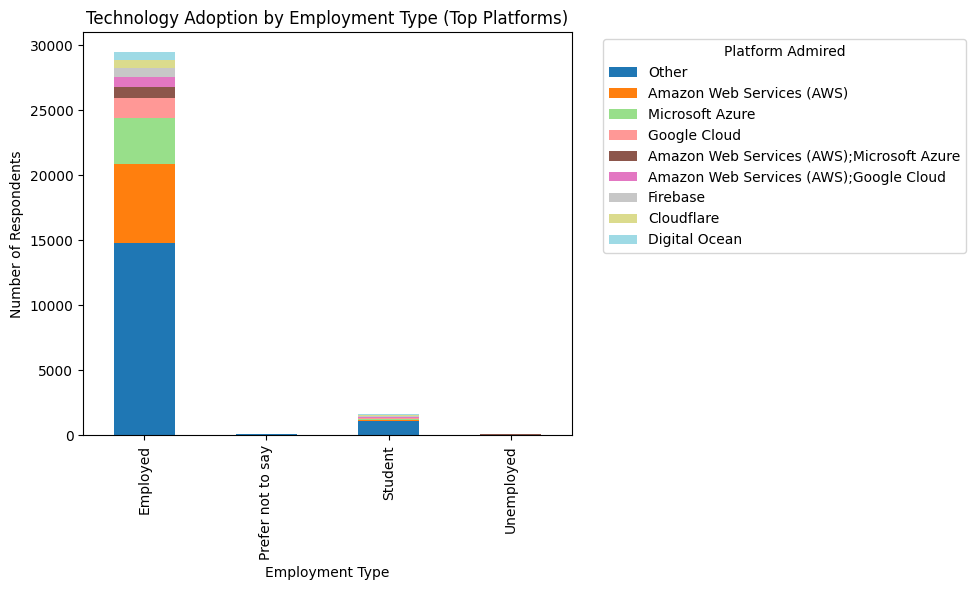

In [30]:
##Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# --- Connect to SQLite ---
conn = sqlite3.connect("survey-results-public.sqlite")

# --- Query data ---
query = """
WITH EmploymentGroups AS (
    SELECT
        CASE
            WHEN Employment LIKE '%Employed%' 
              OR Employment LIKE '%Independent contractor%' THEN 'Employed'
            WHEN Employment LIKE '%Student%' THEN 'Student'
            WHEN Employment LIKE '%Not employed%' 
              OR Employment LIKE '%Retired%' THEN 'Unemployed'
            WHEN Employment = 'I prefer not to say' THEN 'Prefer not to say'
            ELSE 'Mixed'
        END AS EmploymentType,
        PlatformAdmired
    FROM main
)
SELECT EmploymentType, PlatformAdmired
FROM EmploymentGroups
WHERE PlatformAdmired IS NOT NULL;
"""

df = pd.read_sql_query(query, conn)

# --- Count combinations ---
counts = df.value_counts().reset_index(name="RespondentCount")

# --- Keep Top N admired platforms ---
top_n = 8
top_platforms = counts.groupby("PlatformAdmired")["RespondentCount"].sum().nlargest(top_n).index
counts["PlatformAdmired"] = counts["PlatformAdmired"].where(counts["PlatformAdmired"].isin(top_platforms), "Other")

# --- Re-pivot ---
pivot_df = counts.pivot_table(
    index="EmploymentType",
    columns="PlatformAdmired",
    values="RespondentCount",
    aggfunc="sum",
    fill_value=0
)

# --- Sort columns (most popular first) ---
pivot_df = pivot_df[pivot_df.sum().sort_values(ascending=False).index]

# --- Plot stacked bar ---
pivot_df.plot(kind="bar", stacked=True, figsize=(10,6), cmap="tab20")

plt.title("Technology Adoption by Employment Type (Top Platforms)")
plt.xlabel("Employment Type")
plt.ylabel("Number of Respondents")
plt.legend(title="Platform Admired", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()





### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
